In [94]:
serie2 = '../data/submissions/serie2.csv'
SUBMISSIONS = {
    'serie2': serie2,
    'serie3': '../data/submissions/serie3.csv',
    'serie4': '../data/submissions/serie4.csv',
    'serie5': '../data/submissions/serie5.csv',
    'best_1dcnn': '../data/submissions/best_1dcnn.csv',
    'best_gnn': '../data/submissions/best_gnn.csv',
}

SUBMISSIONS = {
    '435': 'submission.csv',
    '430': 'submission_430.csv',
}

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# Load test parquet
test_data = pd.read_parquet('../data/raw/test.parquet')

In [97]:
test_data = test_data.drop(columns=['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles'])

In [98]:
# Add submissions
for submission_name, submission_path in SUBMISSIONS.items():
    submission = pd.read_csv(submission_path)
    test_data[submission_name + '_binds'] = submission['binds']

In [99]:
test_data

,id,protein_name,435_binds,430_binds
0,295246830,BRD4,0.151109,0.195945
1,295246831,HSA,0.110844,0.117394
2,295246832,sEH,0.070111,0.065884
3,295246833,BRD4,0.151114,0.184294
4,295246834,HSA,0.135250,0.195931
...,...,...,...,...
1674891,296921721,HSA,0.004140,0.005673
1674892,296921722,sEH,0.001649,0.002305
1674893,296921723,BRD4,0.000595,0.000434
1674894,296921724,HSA,0.004208,0.004384


,435_binds,430_binds
435_binds,1.000000,0.979188
430_binds,0.979188,1.000000


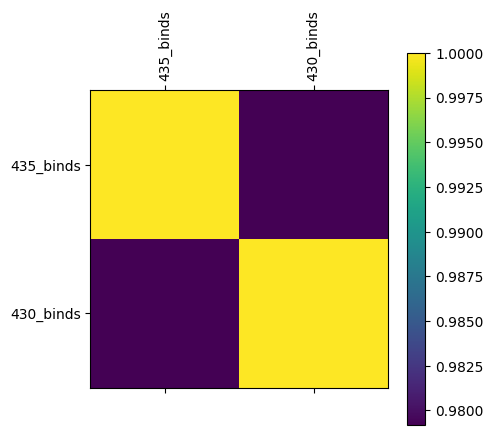

In [100]:
# Calculate similarity between submissions
submissions = test_data[[name + '_binds' for name in SUBMISSIONS.keys()]]
display(submissions.corr())
# Draw correlation matrix with labels
plt.matshow(submissions.corr())
plt.xticks(range(submissions.shape[1]), submissions.columns, fontsize=10, rotation=90)
plt.yticks(range(submissions.shape[1]), submissions.columns, fontsize=10)
plt.colorbar()
plt.show()

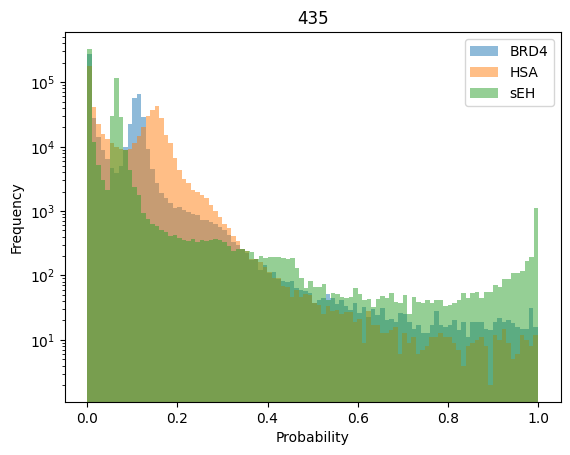

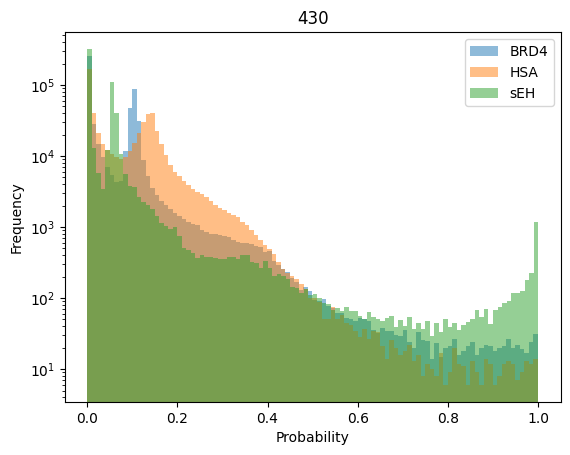

In [101]:
# Plot histogram of binding affinity to frequency for each submission and split on protein name
for submission_name in SUBMISSIONS.keys():
    plt.figure()
    plt.hist(test_data[test_data['protein_name'] == "BRD4"][submission_name + '_binds'], alpha=0.5, bins=100, label='BRD4')
    plt.hist(test_data[test_data['protein_name'] == "HSA"][submission_name + '_binds'], alpha=0.5, bins=100, label='HSA')
    plt.hist(test_data[test_data['protein_name'] == "sEH"][submission_name + '_binds'], alpha=0.5, bins=100, label='sEH')
    plt.yscale('log')
    plt.title(submission_name)
    plt.legend(loc="upper right")
    plt.xlabel("Probability")
    plt.ylabel("Frequency")
    plt.show()